In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Qu'est-ce que Seaborn ?
Seaborn est une bibliothèque de visualisation de données Python basée sur Matplotlib. Elle fournit une interface de haut niveau pour dessiner des graphiques statistiques attrayants et informatifs.

Le lien avec Matplotlib :  
Si Matplotlib est le "moteur", Seaborn est le "pilote automatique".

Matplotlib : Très puissant et flexible, mais nécessite souvent beaucoup de lignes de code pour rendre un graphique esthétique ou complexe.

Seaborn : Utilise Matplotlib en arrière-plan. Elle simplifie la syntaxe (notamment pour les DataFrames pandas) et applique des thèmes par défaut beaucoup plus modernes.

Note : On importe souvent les deux, car on utilise Seaborn pour tracer le graphique et Matplotlib pour ajuster les détails finaux (titres, axes, taille de la figure), remarquez que l'on rajoute des appels de méthodes pyplot (plt.title par exemple)

In [ ]:
# Appliquer le thème par défaut de seaborn (plus esthétique)
sns.set_theme(style="whitegrid")

# Chargement des jeux de données
tips = sns.load_dataset("tips")       # Données de restaurant
flights = sns.load_dataset("flights") # Données de passagers aériens

# Aperçu des données
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Seaborn est fortement orienté DataFrame (notamment pandas) : il exploite directement les colonnes et leurs relations, ce qui suppose généralement des données déjà structurées sous forme tabulaire.  

Matplotlib, en revanche, fonctionne à un niveau plus bas et accepte nativement des structures simples comme des listes Python ou des tableaux NumPy, offrant ainsi plus de flexibilité mais moins d’abstraction.  

Nuance importante : Seaborn peut techniquement accepter des tableaux NumPy, mais son API est clairement conçue pour tirer parti des DataFrames

## 2. Graphiques catégoriels

### Countplot
Le countplot permet de visualiser le nombre d'observations dans chaque catégorie. C'est l'équivalent d'un histogramme pour variables catégorielles.

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


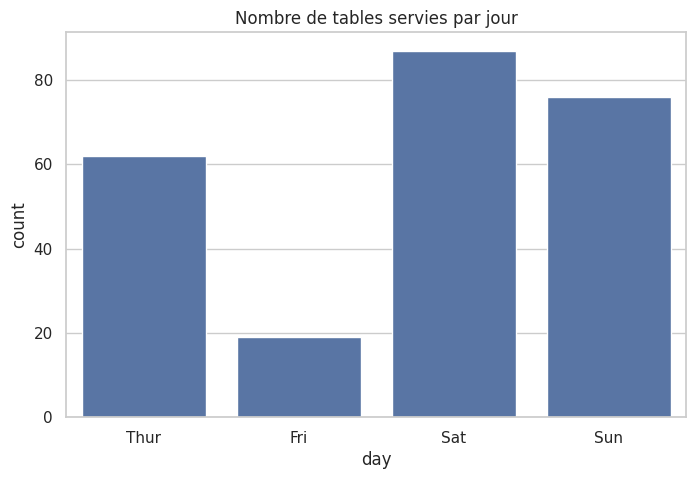

In [ ]:
plt.figure(figsize=(8, 5))
# Compter le nombre de clients par jour
sns.countplot(data=tips, x="day")

plt.title("Nombre de tables servies selon la journée")
# Ici une ligne = une table servie
plt.show()

### Barplot
Le barplot est différent : il calcule une agrégation (par défaut la moyenne) d'une variable numérique pour chaque catégorie.

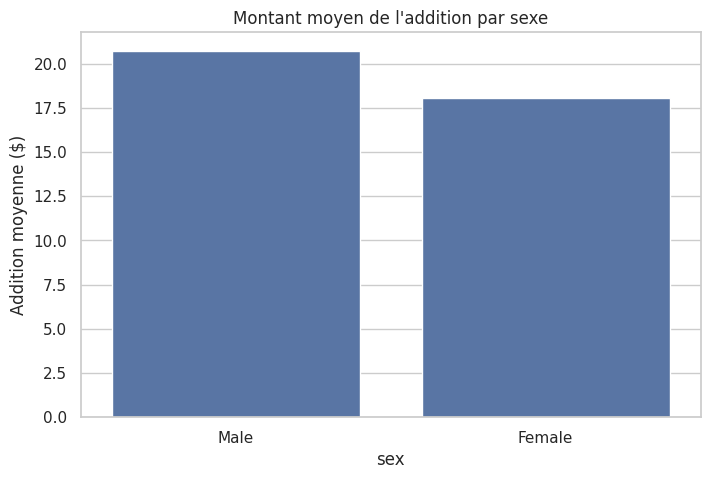

In [ ]:
plt.figure(figsize=(8, 5))
# Moyenne de l'addition totale (total_bill) par sexe
sns.barplot(data=tips, x="sex", y="total_bill", errorbar=None)

plt.title("Montant moyen de l'addition par sexe")
plt.ylabel("Addition moyenne ($)")
plt.show()

## 3. Graphiques relationnels

Ils servent à visualiser la relation statistique entre deux variables numériques.

### Scatterplot (Nuage de points)
Idéal pour voir la corrélation entre deux variables. Seaborn brille ici grâce au paramètre hue qui ajoute une dimension de couleur automatiquement.

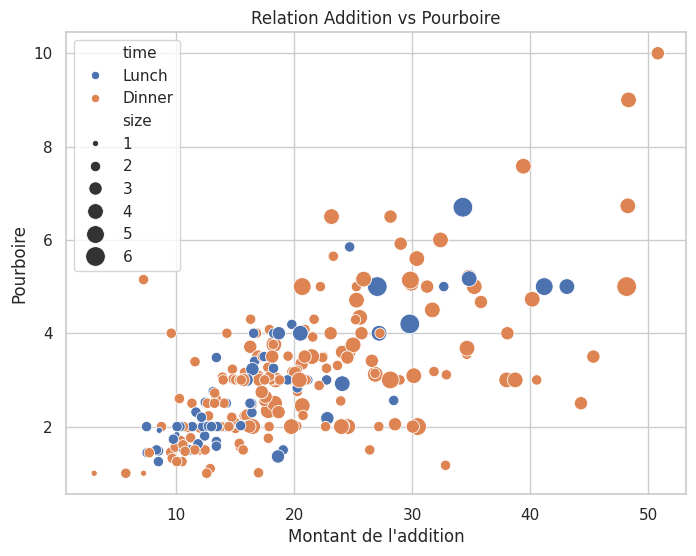

In [ ]:
plt.figure(figsize=(8, 6))
# Relation entre le montant total et le pourboire, coloré par le moment de la journée
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", size="size", sizes=(20, 200))

plt.title("Relation Addition vs Pourboire")
plt.xlabel("Montant de l'addition")
plt.ylabel("Pourboire")
plt.show()

### Lineplot (Courbe)
Parfait pour les séries temporelles ou pour montrer l'évolution d'une variable.

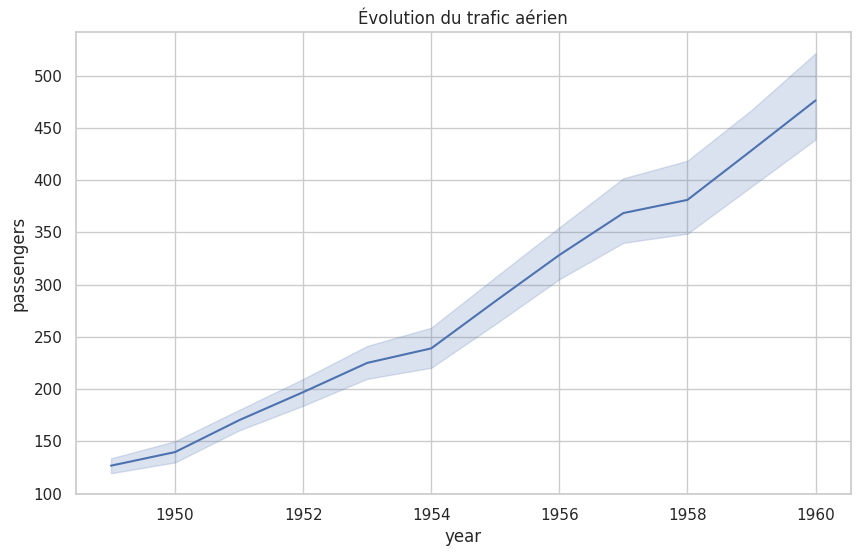

In [ ]:
plt.figure(figsize=(10, 6))
# Évolution du nombre de passagers par année
sns.lineplot(data=flights, x="year", y="passengers")

plt.title("Évolution du trafic aérien")
plt.show()

## 4. Graphiques distributionnels
Ils permettent de comprendre comment les données sont réparties (loi normale, asymétrie, etc.).

### Histplot (Histogramme)
Une version plus puissante que celle de Matplotlib, permettant d'ajouter facilement une estimation de densité (KDE).

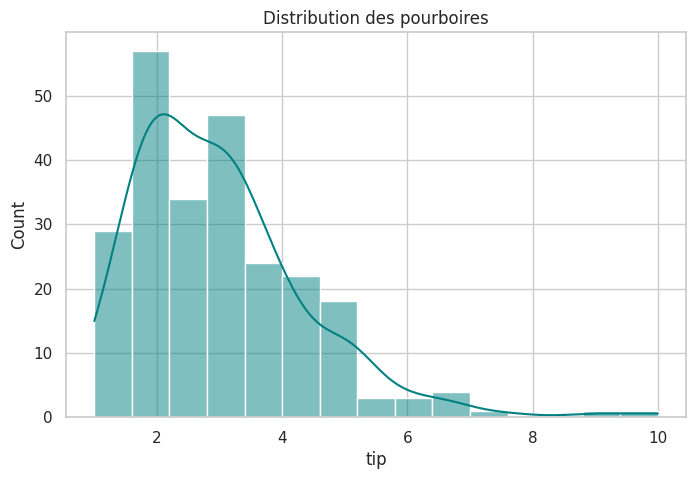

In [ ]:
plt.figure(figsize=(8, 5))
# Distribution des pourboires avec courbe de densité (kde=True)
sns.histplot(data=tips, x="tip", kde=True, bins=15, color="teal")

plt.title("Distribution des pourboires")
plt.show()

### Kdeplot (Kernel Density Estimate)

Affiche uniquement la densité de probabilité (une courbe lisse). C'est très utile pour comparer des distributions.

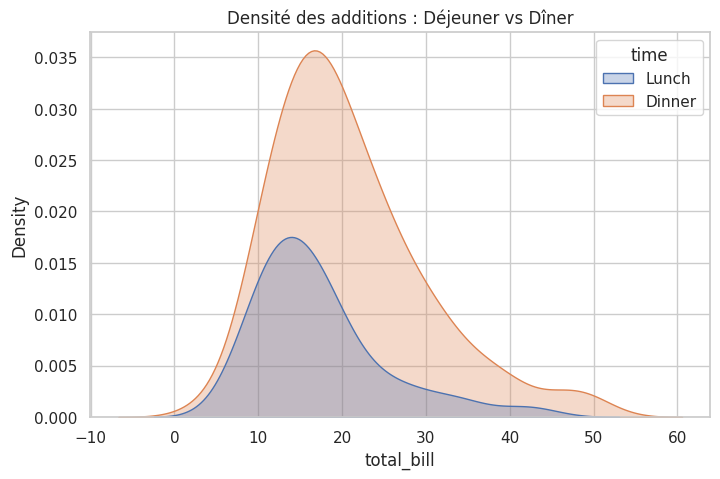

In [ ]:
plt.figure(figsize=(8, 5))
# Comparaison des distributions d'addition selon le moment (Déjeuner vs Dîner)
sns.kdeplot(data=tips, x="total_bill", hue="time", fill=True, alpha=0.3)
# Remarquez le paramètre "hue"
plt.title("Densité des additions : Déjeuner vs Dîner")
plt.show()

# Seaborn avancé

## Faceting

C'est sans doute la fonctionnalité la plus puissante de Seaborn. Au lieu de créer manuellement des plt.subplots, Seaborn peut diviser automatiquement le graphique en sous-grilles selon une variable catégorielle.

Fonctions clés : **relplot()**, **catplot()**, **displot()**. Ces fonctions sont dites "Figure-level" et possèdent les arguments col= et row=

L'objectif est de créer une grille de graphiques pour séparer les données selon une catégorie (ici, le moment de la journée : Ddéjeuner vs dîner). On utilise relplot (figure-level function).

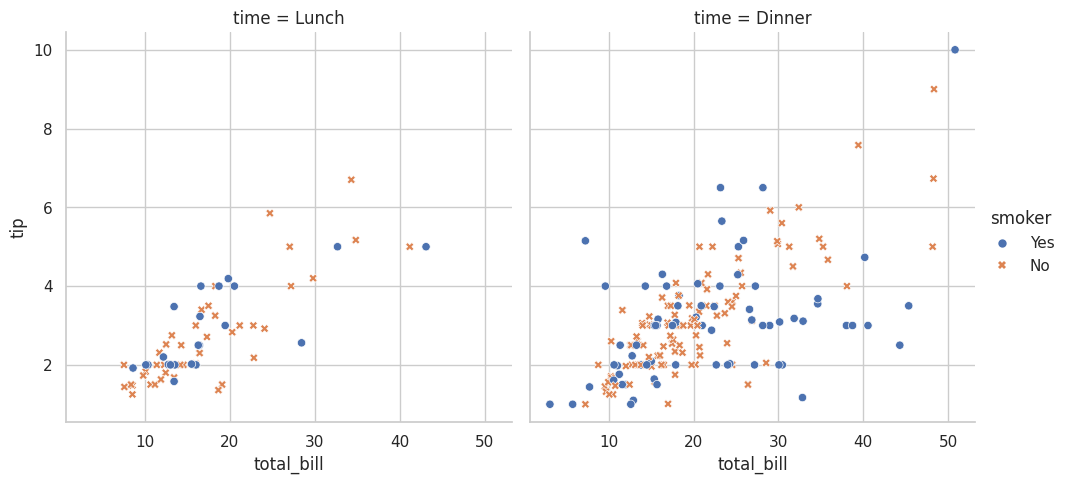

In [ ]:
# Sépare le graphique en deux colonnes selon la variable 'time'
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="smoker",   # Couleur selon fumeur/non-fumeur
    col="time",     # C'est ici le plus important : une colonne par moment (Lunch/Dinner)
    style="smoker", # Change aussi la forme du point pour plus de lisibilité
    height=5,       # Taille de chaque sous-graphique
    aspect=1
)

plt.show()

## Matrices et corrélations

Visualiser les relations entre toutes les variables d'un coup.

**Heatmap** (Carte de chaleur) : Indispensable pour visualiser les matrices de corrélation (df.corr()). Elle colore les cases selon l'intensité de la valeur.

Pour afficher la matrice de corrélation, il faut d'abord calculer les corrélations mathématiques (attention : uniquement sur les colonnes numériques).

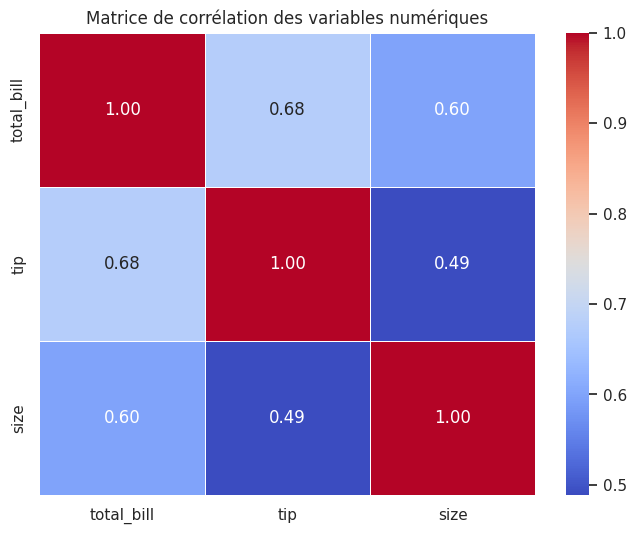

In [ ]:
plt.figure(figsize=(8, 6))

# 1. Filtrer uniquement les colonnes numériques pour le calcul
numeric_tips = tips.select_dtypes(include=['float64', 'int64'])

# 2. Calculer la matrice de corrélation
corr_matrix = numeric_tips.corr() # Corrélation de Pearson par défaut

# 3. Afficher la Heatmap
sns.heatmap(
    corr_matrix, 
    annot=True,     # Affiche les chiffres dans les cases
    cmap="coolwarm", # Palette de couleur (Bleu = froid/négatif, Rouge = chaud/positif)
    fmt=".2f",      # Format des nombres (2 décimales)
    linewidths=0.5  # Petites lignes blanches entre les cases
)

plt.title("Matrice de corrélation des variables numériques")
plt.show()

**Clustermap** : Une version avancée de la heatmap qui réorganise (trie) automatiquement les lignes et colonnes pour regrouper les données similaires.

La Clustermap est une visualisation fascinante car elle ne se contente pas d'afficher les données : elle les réorganise.

Elle utilise un algorithme de clustering hiérarchique pour regrouper les lignes et les colonnes qui se ressemblent.

In [ ]:
# 1. Préparation des données : Il faut une structure matricielle (Tableau croisé)
# On transforme la liste brute en grille : Lignes = Mois, Colonnes = Années
flights_matrix = flights.pivot(index="month", columns="year", values="passengers")
flights_matrix

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


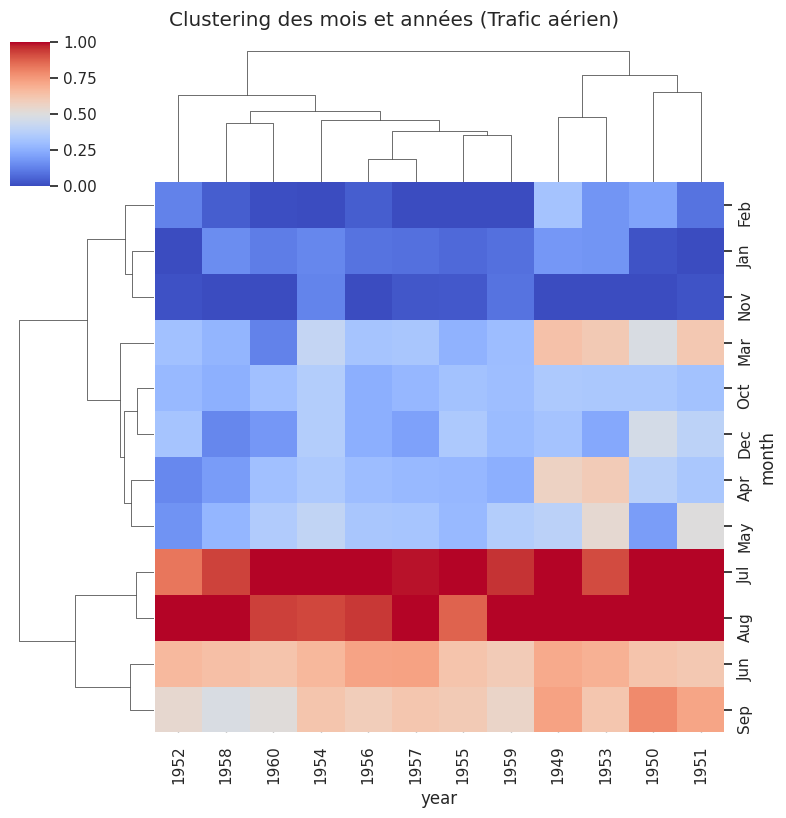

In [ ]:
# 2. Création de la Clustermap
# standard_scale=1 : Normalise les données par colonne (année) pour mieux voir la saisonnalité
# (0 correspond aux lignes, 1 aux colonnes)
g = sns.clustermap(
    data=flights_matrix,
    cmap="coolwarm",    # Palette de couleurs
    standard_scale=1,   # Important pour comparer les profils des mois malgré l'augmentation du trafic global
    figsize=(8, 8)      # Taille carrée souvent préférable pour les matrices
)

# Titre (un peu plus complexe à placer sur une clustermap car c'est une figure composée)
g.fig.suptitle("Clustering des mois et années (Trafic aérien)", y=1.02)
plt.show()

## Distributions Complexes

Ici, nous allons voir deux graphiques très populaires pour l'analyse exploratoire (EDA).

**Pairplot** : Trace une grille de graphiques comparant toutes les variables numériques deux à deux. C'est souvent la première ligne de code qu'on lance pour explorer un nouveau dataset.

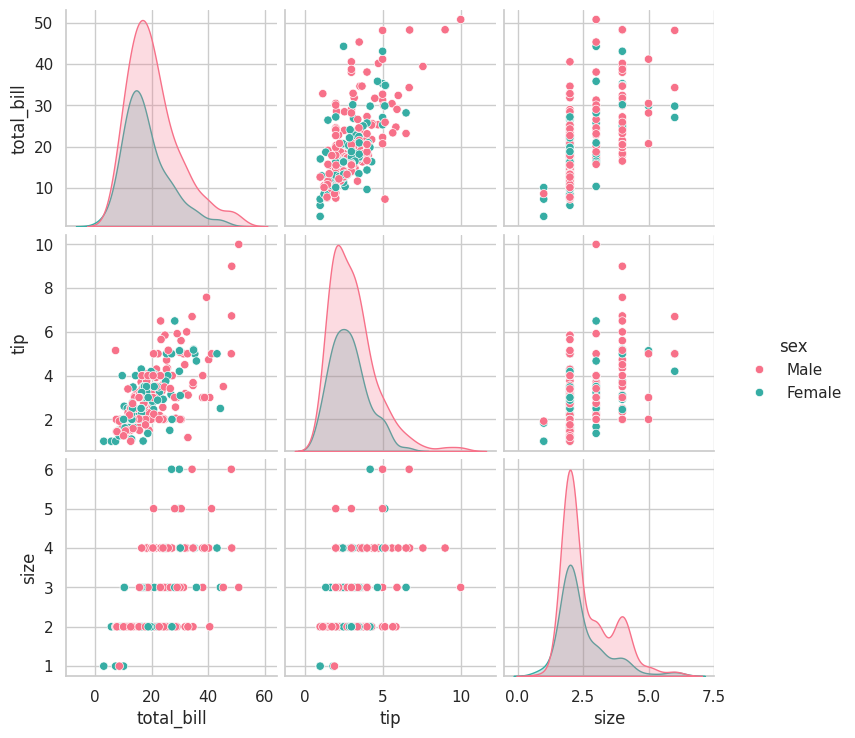

In [ ]:
# Trace une grille comparant toutes les variables numériques
# hue="sex" permet de voir si les hommes et femmes forment des groupes distincts, ce sont nos couleurs différentes
sns.pairplot(tips, hue="sex", palette="husl")

plt.show()

**Jointplot** : Combine un nuage de points (au centre) avec les histogrammes de chaque variable sur les axes (marges). Cela permet de voir à la fois la corrélation et la distribution individuelle.

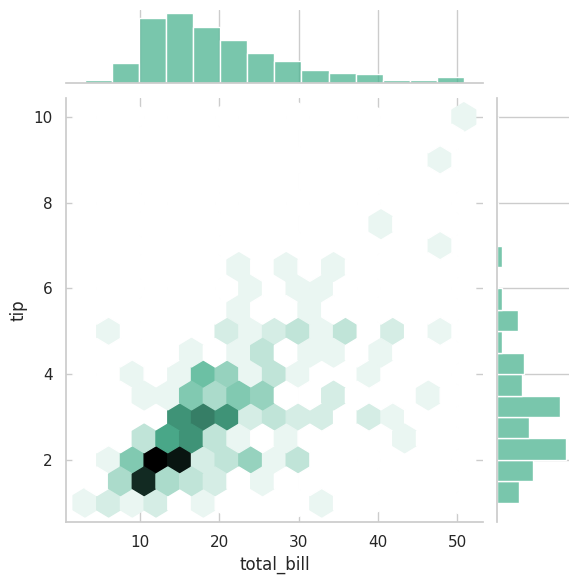

In [ ]:
# kind="hex" remplace les points par des hexagones (fortement recommandé quand il y a beaucoup de points)
sns.jointplot(
    data=tips, 
    x="total_bill", 
    y="tip", 
    kind="hex", 
    color="#4CB391"
)

plt.show()

## Régression linéaire

Seaborn peut tracer automatiquement une droite de régression et son intervalle de confiance (la zone ombrée translucide autour de la ligne), soit intégrer des modèles statistiques directement dans le visuel.

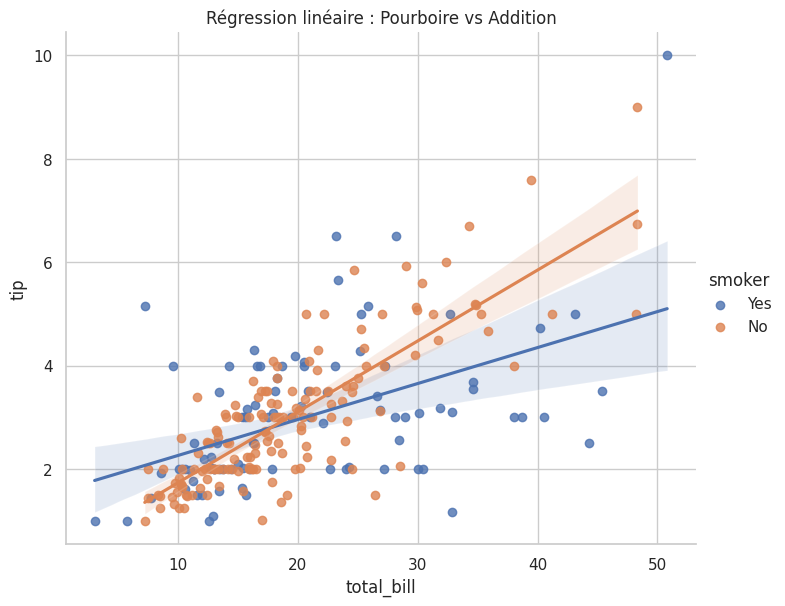

In [ ]:
# Trace la régression linéaire pour voir la tendance
sns.lmplot(
    data=tips, 
    x="total_bill", 
    y="tip", 
    hue="smoker",   # Trace deux droites de régression distinctes (fumeur vs non-fumeur)
    height=6,
    aspect=1.2
)

plt.title("Régression linéaire : Pourboire vs Addition")
plt.show()

# Exercices

In [ ]:
titanic = sns.load_dataset("titanic")
penguins = sns.load_dataset("penguins")

## Exercice 1 : distribution simple
Énoncé : Utilisez le dataset titanic. Affichez la distribution des âges (age) des passagers sous forme d'histogramme, en ajoutant la courbe de densité (KDE). Changez la couleur des barres en rouge.

## Exercice 2 : comparaison catégorielle (Boxplot)
Énoncé : Utilisez le dataset tips. Créez un Boxplot (boîte à moustaches) montrant la répartition du montant de l'addition (total_bill) pour chaque jour de la semaine (day).

## Exercice 3 : relation et couleur
Énoncé : Utilisez le dataset penguins. Créez un Scatterplot montrant la relation entre la longueur du bec (bill_length_mm) et la longueur de la nageoire (flipper_length_mm). Utilisez l'argument hue pour colorer les points selon l'espèce (species).

## Exercice 4 : Faceting (sous-graphiques)
Énoncé : Utilisez le dataset tips. Vous voulez savoir si les fumeurs donnent plus de pourboire que les non-fumeurs, mais en séparant l'analyse selon le sexe. Utilisez sns.catplot pour créer des Violinplots de la variable tip.

Axe X : sex

Axe Y : tip

Couleur (hue) : smoker

Séparez les graphiques en deux colonnes (col) selon le moment de la journée (time).

Bonus : Utilisez split=True pour fusionner les violons.

## Exercice 5 : Matrice de Corrélation
Énoncé : Utilisez le dataset penguins.

Créez une matrice de corrélation qui n'inclut que les colonnes numériques (indice : utilisez df.select_dtypes).

Affichez cette matrice avec une Heatmap.

Affichez les valeurs numériques dans les cases et utilisez une palette qui diverge (ex: "vlag" ou "coolwarm").

## Exercice 6 : Régression linéaire et grille
Énoncé : Utilisez le dataset tips. Nous voulons voir la régression linéaire entre l'addition (total_bill) et le pourboire (tip). Utilisez sns.lmplot pour afficher cette relation, mais créez une grille de graphiques :

En colonnes : le jour de la semaine (day).

En lignes : le sexe (sex).

La couleur des points/lignes doit dépendre du statut fumeur (smoker).